In [2]:
%matplotlib inline

import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print("hello")

hello


In [3]:
num_inputs = 2
num_examples= 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()))

print(features[0], labels[0])

tensor([ 1.3300, -0.6411]) tensor(9.0459)


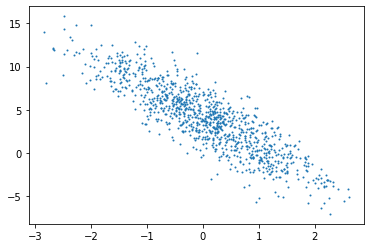

In [4]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

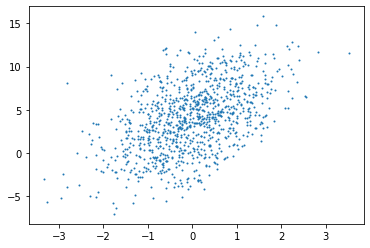

In [5]:
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)


In [6]:
from d2lzh.function import *

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


tensor([[ 2.0150e+00, -1.9197e-01],
        [ 2.2700e-02, -1.1128e+00],
        [ 4.8119e-02,  1.1923e+00],
        [ 4.2509e-01,  1.3600e+00],
        [-5.3625e-01,  1.8865e+00],
        [ 6.6984e-01, -1.4725e+00],
        [-1.6845e+00, -1.9449e+00],
        [-1.5869e+00, -2.0045e-03],
        [-1.0977e-01, -8.0814e-01],
        [-1.7790e-01,  3.3741e-01]]) tensor([ 8.8876,  8.0408,  0.2582,  0.3984, -3.2957, 10.5462,  7.4466,  1.0347,
         6.7430,  2.7061])


In [11]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)
print(w, b)

tensor([[-0.0022],
        [-0.0070]], requires_grad=True) tensor([0.], requires_grad=True)


In [12]:
from d2lzh.function import *

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in  range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.045788
epoch 2, loss 0.000180
epoch 3, loss 0.000050


In [13]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9991],
        [-3.3994]], requires_grad=True)
4.2 
 tensor([4.2000], requires_grad=True)


In [14]:
xx = torch.tensor([1,2])
xx.data

tensor([1, 2])